### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load The Dataset and cleaning it 

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.duplicated().sum()

0

In [8]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- ###### The data is Clean no null value found , no repeated columns wre found and each column has it's corrected datatype

# Explore The DataSet
### Description of the dataset

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- ###### the Standard divination of each column is very high , that indicates that the data most of the data point are very var form the mean values , that indicates also the presences of Outliers value

### Is The Data Correlated to each other  

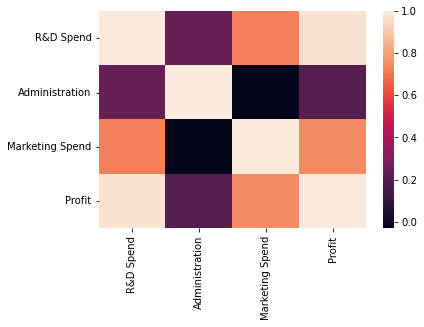

In [15]:
sns.heatmap(df.corr())

- ###### there is very high corelation between `Profit` column and `R&D Spend` Columns

### What Is the Covariance and Correlation of all the dataset  

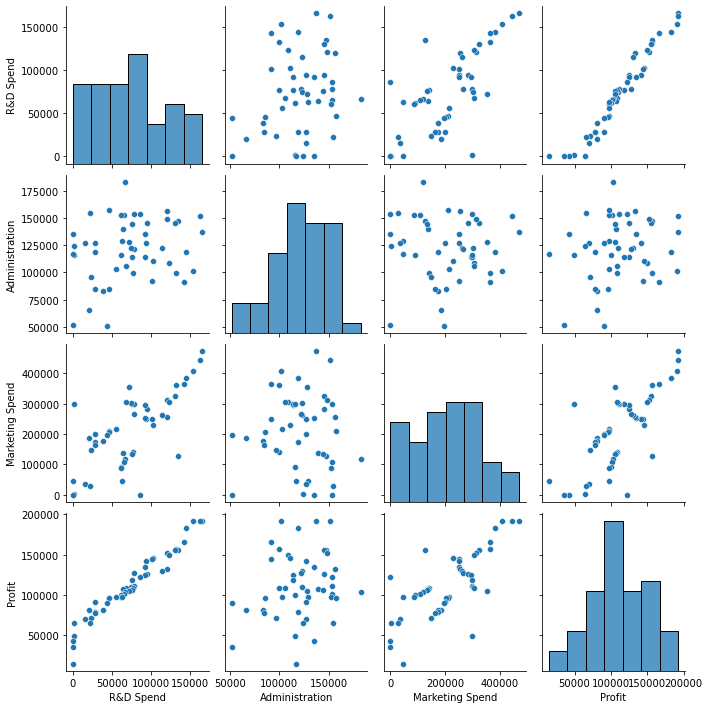

In [16]:
sns.pairplot(df)

- ###### The `Profit` can increased by investing more money in marketing and defecate more time to Research and Development        

### Dose The Location Effect on The Profit 

In [17]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

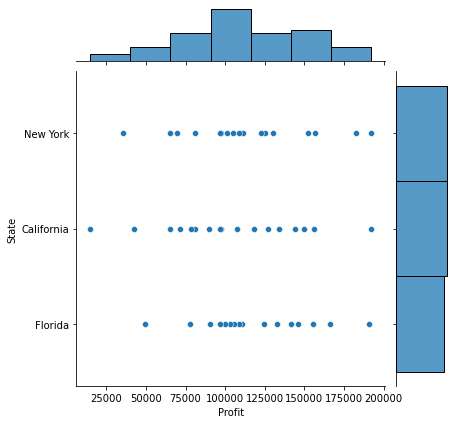

In [18]:
sns.jointplot(x='Profit',y='State',data=df)

In [24]:
df.pivot_table(values='Profit',columns='State',aggfunc=np.mean)

State,California,Florida,New York
Profit,103905.175294,118774.024375,113756.446471


- ###### Most of Company located in Florida , has higher profit rate than any other company located in different state    
- ###### That Means also That Company Location Can Be Considered as important feature to determine the company profit  beside  the marketing and R&D Time                            

### Does The Companies Located in `Florida` invest in Marketing and R&D

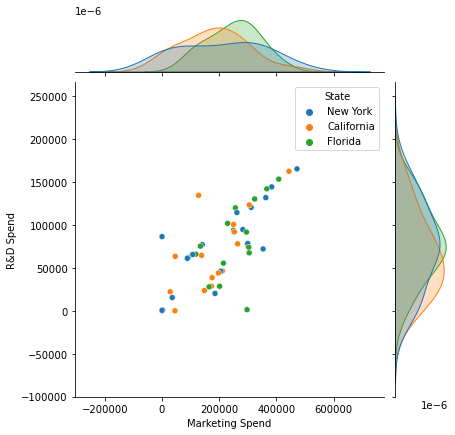

In [28]:
sns.jointplot(x='Marketing Spend',y='R&D Spend',data=df,hue='State')

In [30]:
df.pivot_table(values='Marketing Spend',columns='State',aggfunc=np.mean)

State,California,Florida,New York
Marketing Spend,182540.929412,247323.55125,205346.015882


In [29]:
df.pivot_table(values='R&D Spend',columns='State',aggfunc=np.mean)

State,California,Florida,New York
R&D Spend,64657.674118,80724.01625,76195.062353


- ###### Yes all company in Florida invest more in R&D and marketing than other companies located in other states

# Train LinearRegression Model With `Marketing Spend` `R&D Spend`, `Administration`  To predict `Profit` Column 

In [72]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'State_Encode'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [74]:
X=df.iloc[:,0:3]
y=df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
lm.intercept_

35914.86249847704

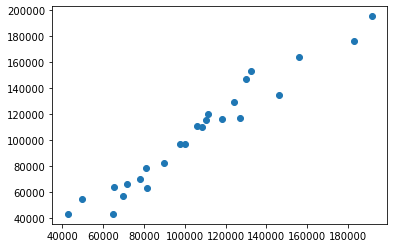

In [76]:
plt.scatter(y_test,lm.predict(X_test))


In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(X_test))))

MAE: 7649.619247980765
MSE: 95432059.7328803
RMSE: 9768.933397914037


- ###### Model Performance Is Very Bad No Good Fit is Found  

----

# Train LinearRegression Model With `Marketing Spend` `R&D Spend`,`State`  To predict `Profit` Column 
----
Using Only The High correlated columns we found in the Data Explore Part and State Column

In [78]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [79]:
df['State_Encode']=df['State'].map({'California':0,'New York':1,'Florida':2})

In [80]:
df.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Encode
0,165349.20,136897.80,471784.10,New York,192261.83,1
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,2
3,144372.41,118671.85,383199.62,New York,182901.99,1


In [81]:
X=df[['R&D Spend','Marketing Spend','State_Encode']]
y=df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
lm.intercept_

41010.28344898805

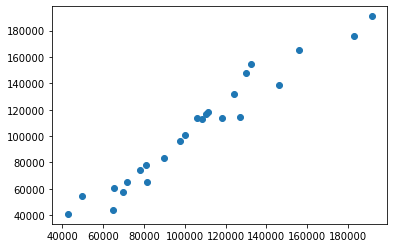

In [83]:
plt.scatter(y_test,lm.predict(X_test))


In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(X_test))))

MAE: 7819.658165021088
MSE: 94549770.14737572
RMSE: 9723.67061080206


- ###### Model Performance Is Very Bad No Good Fit is Found  

# Train LinearRegression Model With `Marketing Spend` `R&D Spend` To predict `Profit` Column 
----
Using Only The High correlated columns

In [87]:
X=df[['R&D Spend','Marketing Spend']]
y=df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
lm.intercept_

42630.13636417112

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lm.predict(X_test))))

MAE: 6938.419104502203
MSE: 83738033.48666213
RMSE: 9150.848785039678


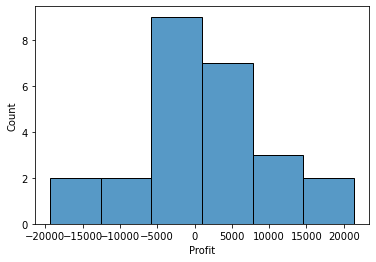

In [90]:
sns.histplot(y_test-lm.predict(X_test))

> ## Linear Regression is Not Suitable Algorithm For This Problem    